# *BULANIK MANTIK ve PYTHON UYGULAMALARI* - Öğr. Gör Ali ÇETİNKAYA

***ISBN: *** 978-605-4827-98-5

## **Bölüm 9.4. Uygulama 4 Python Kod Uygulaması**


In [1]:
!pip install -U scikit-fuzzy # scikit-fuzzy kütüphanesinin kurumunu yapıyoruz.
!pip install numpy
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=a14bc0fc2b813ac91bd39a75e1e106f79fa98eb1226152677ff69c51bc5ffa55
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [3]:
print("Numpy sürümü: ", np.__version__)
print("Scikit-fuzzy sürümü: ", fuzz.__version__)
print("Matplotlib sürümü: ", plt.matplotlib.__version__)

Numpy sürümü:  1.22.4
Scikit-fuzzy sürümü:  0.4.2
Matplotlib sürümü:  3.7.1


Hava Sıcaklığı Kaç Derece ? 30
Ortamın Nem Miktarı Yüzde Kaç ? 60


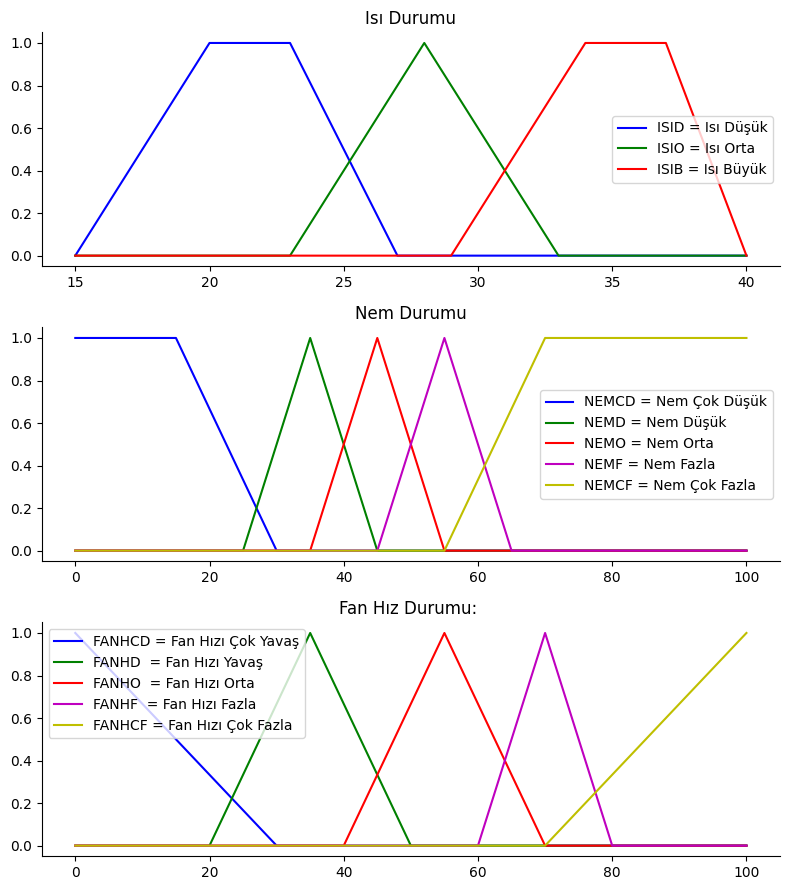

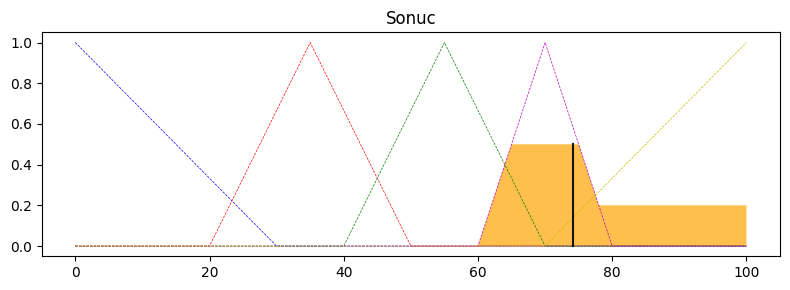

Fan Hızı =  74.19999999999999  RPM


In [4]:
# Bulanık Sistem Oluşturuluyor
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

isi = np.arange(15, 41, 1)
nem = np.arange(0, 101, 1)
fan_hizi  = np.arange(0, 101, 1)

ISID = fuzz.trapmf(isi, [15, 20, 23, 27])
ISIO = fuzz.trimf(isi, [23, 28, 33])
ISIB = fuzz.trapmf(isi, [29, 34, 37, 40])

NEMCD = fuzz.trapmf(nem, [0, 0, 15, 30])
NEMD  = fuzz.trimf(nem, [25, 35, 45])
NEMO  = fuzz.trimf(nem, [35, 45, 55])
NEMF  = fuzz.trimf(nem, [45, 55, 65])
NEMCF = fuzz.trapmf(nem, [55, 70, 100, 100])

FANHCD = fuzz.trimf(fan_hizi, [0, 0, 30])
FANHD = fuzz.trimf(fan_hizi, [20, 35, 50])
FANHO = fuzz.trimf(fan_hizi, [40, 55, 70])
FANHF = fuzz.trimf(fan_hizi, [60, 70, 80])
FANHCF = fuzz.trimf(fan_hizi, [70, 100, 100])

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(isi, ISID, 'b', linewidth=1.5, label='ISID = Isı Düşük')
ax0.plot(isi, ISIO, 'g', linewidth=1.5, label='ISIO = Isı Orta')
ax0.plot(isi, ISIB, 'r', linewidth=1.5, label='ISIB = Isı Büyük')
ax0.set_title('Isı Durumu')
ax0.legend()

ax1.plot(nem, NEMCD, 'b', linewidth=1.5, label='NEMCD = Nem Çok Düşük')
ax1.plot(nem, NEMD, 'g',  linewidth=1.5, label='NEMD = Nem Düşük')
ax1.plot(nem, NEMO, 'r',  linewidth=1.5, label='NEMO = Nem Orta')
ax1.plot(nem, NEMF, 'm',  linewidth=1.5, label='NEMF = Nem Fazla')
ax1.plot(nem, NEMCF, 'y', linewidth=1.5, label='NEMCF = Nem Çok Fazla') 
ax1.set_title('Nem Durumu')
ax1.legend()

ax2.plot(fan_hizi, FANHCD, 'b', linewidth=1.5, label='FANHCD = Fan Hızı Çok Yavaş')
ax2.plot(fan_hizi, FANHD, 'g',  linewidth=1.5, label='FANHD  = Fan Hızı Yavaş')
ax2.plot(fan_hizi, FANHO, 'r',  linewidth=1.5, label='FANHO  = Fan Hızı Orta')
ax2.plot(fan_hizi, FANHF, 'm',  linewidth=1.5, label='FANHF  = Fan Hızı Fazla ')
ax2.plot(fan_hizi, FANHCF, 'y', linewidth=1.5, label='FANHCF = Fan Hızı Çok Fazla')
ax2.set_title('Fan Hız Durumu: ')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

#kullanıcı girişleri
isi_derecesi = input('Hava Sıcaklığı Kaç Derece ? ')
nem_orani = input('Ortamın Nem Miktarı Yüzde Kaç ? ')

Isi_dusuk = fuzz.interp_membership(isi, ISID, float(isi_derecesi))
Isi_orta = fuzz.interp_membership(isi, ISIO, float(isi_derecesi))
Isi_buyuk = fuzz.interp_membership(isi, ISIB, float(isi_derecesi))

Nem_cok_dusuk = fuzz.interp_membership(nem, NEMCD, float(nem_orani))
Nem_dusuk = fuzz.interp_membership(nem, NEMD, float(nem_orani))
Nem_orta = fuzz.interp_membership(nem, NEMO, float(nem_orani))
Nem_fazla = fuzz.interp_membership(nem, NEMF, float(nem_orani))
Nem_cok_fazla = fuzz.interp_membership(nem, NEMCF, float(nem_orani))

#Kurallar uygulanıyor
#kural 1
Kural1 = np.fmin(Isi_dusuk,Nem_cok_dusuk)
Kontrol_kural1 = np.fmin(Kural1,FANHCD)
#kural 2
Kural2 = np.fmin(Isi_orta,Nem_cok_dusuk)
Kontrol_kural2 = np.fmin(Kural2,FANHD)
#kural 3
Kural3 = np.fmin(Isi_buyuk,Nem_cok_dusuk)
Kontrol_kural3 = np.fmin(Kural3,FANHF)
#kural 4
Kural4 = np.fmin(Isi_dusuk,Nem_dusuk)
Kontrol_kural4 = np.fmin(Kural4,FANHD)
#kural 5
Kural5 = np.fmin(Isi_orta,Nem_dusuk)
Kontrol_kural5 = np.fmin(Kural5,FANHO)
#kural 6
Kural6 = np.fmin(Isi_buyuk,Nem_dusuk)
Kontrol_kural6 = np.fmin(Kural6,FANHF)
#kural 7
Kural7 = np.fmin(Isi_dusuk,Nem_orta)
Kontrol_kural7 = np.fmin(Kural7,FANHD)
#kural 8
Kural8 = np.fmin(Isi_orta,Nem_orta)
Kontrol_kural8 = np.fmin(Kural8,FANHF)
#kural 9
Kural9 = np.fmin(Isi_buyuk,Nem_orta)
Kontrol_kural9 = np.fmin(Kural9,FANHCF)
#kural 10
Kural10 = np.fmin(Isi_dusuk,Nem_fazla)
Kontrol_kural10 = np.fmin(Kural10,FANHO)
#kural 11
Kural11 = np.fmin(Isi_orta,Nem_fazla)
Kontrol_kural11 = np.fmin(Kural11,FANHF)
#kural 12
Kural12 = np.fmin(Isi_buyuk,Nem_fazla)
Kontrol_kural12 = np.fmin(Kural12,FANHCF)
#kural 13
Kural13 = np.fmin(Isi_dusuk,Nem_cok_fazla)
Kontrol_kural13 = np.fmin(Kural13,FANHO)
#kural 14
Kural14 = np.fmin(Isi_orta,Nem_cok_fazla)
Kontrol_kural14 = np.fmin(Kural14,FANHF)
#kural 15
Kural15 = np.fmin(Isi_buyuk,Nem_cok_fazla)
Kontrol_kural15 = np.fmin(Kural15,FANHCF)

ctr0 = np.zeros_like(fan_hizi)

c1 = np.fmax(Kontrol_kural1,Kontrol_kural2)
c2 = np.fmax(Kontrol_kural3,Kontrol_kural4)
c3 = np.fmax(Kontrol_kural5,Kontrol_kural6)
c4 = np.fmax(Kontrol_kural7,Kontrol_kural8)
c5 = np.fmax(Kontrol_kural9,Kontrol_kural10)
c6 = np.fmax(Kontrol_kural11,Kontrol_kural12)
c7 = np.fmax(Kontrol_kural13,Kontrol_kural14)
c8 = np.fmax(Kontrol_kural15,Kontrol_kural15)

c9 = np.fmax(c2,c3)
c10 = np.fmax(c4,c5)
c11 = np.fmax(c6,c7)

c12 = np.fmax(c9,c10)
c13 = np.fmax(c11,c12)

c14 = np.fmax(c8,c13)

toplanan_kurallar = np.fmax(c1,c14)

durulama_islemi = fuzz.defuzz(fan_hizi, toplanan_kurallar, 'bisector')

islem_sonucu = fuzz.interp_membership(fan_hizi,toplanan_kurallar,durulama_islemi)

fig, ax4 = plt.subplots(figsize=(8,3))

ax4.plot(fan_hizi, FANHCD,'b',linewidth=.5, linestyle='--')
ax4.plot(fan_hizi, FANHD,'r',linewidth=.5, linestyle='--')
ax4.plot(fan_hizi, FANHO,'g',linewidth=.5, linestyle='--')
ax4.plot(fan_hizi, FANHF,'m',linewidth=.5, linestyle='--')
ax4.plot(fan_hizi, FANHCF,'y',linewidth=.5, linestyle='--')

ax4.fill_between(fan_hizi,ctr0,toplanan_kurallar, facecolor='orange',alpha=0.7)
ax4.plot([durulama_islemi, durulama_islemi],[0,islem_sonucu],'k',linewidth=1.5,alpha=0.9)

ax4.set_title('Sonuc')
plt.tight_layout()
plt.show()
print ("Fan Hızı = " , durulama_islemi , " RPM")


Kitabın Bulunduğu Sayfalar:

https://www.pandora.com.tr/kitap/bulanik-mantik-ve-python-uygulamalari/853298

https://www.kitapyurdu.com/kitap/bulanik-mantik-ve-python-uygulamalari/644153.html 

https://www.dr.com.tr/Kitap/Bulanik-Mantik-ve-Python-Uygulamalari/Egitim-Basvuru/Bilgisayar/urunno=0002035935001

https://kddb.gelisim.edu.tr/tr/idari-duyuru-igu-yayinlarindan-106-kitap-bulanik-mantik-ve-python-uygulamalari 


